# Выбор локации для скважины

Прошу максимально быстро проверить работу, так как нужно приступить к финальному проекту, параллельно с курсами у меня сессия в магистратуре и практика, поэтому, если это возможно, указывать на все недочеты в проекте, без которых он не может быть принят. 

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Условия задачи:
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Данные геологоразведки трёх регионов находятся в файлах: 

/datasets/geo_data_0.csv. 

/datasets/geo_data_1.csv. 

/datasets/geo_data_2.csv. 



- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

Ход решения:

1. Загрузите и подготовьте данные. Поясните порядок действий.
2. Обучите и проверьте модель для каждого региона:

2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.

2.2. Обучите модель и сделайте предсказания на валидационной выборке.

2.3. Сохраните предсказания и правильные ответы на валидационной выборке.

2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.

2.5. Проанализируйте результаты.


3. Подготовьтесь к расчёту прибыли:


3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.


3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 


3.3. Напишите выводы по этапу подготовки расчёта прибыли.


4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
 
 
4.1. Выберите скважины с максимальными значениями предсказаний. 
 
4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.

4.3. Рассчитайте прибыль для полученного объёма сырья.

5. Посчитайте риски и прибыль для каждого региона:

5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

## Загрузка и подготовка данных

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from scipy import stats as st

In [215]:
data1 = pd.read_csv('/datasets/geo_data_0.csv')
data2 = pd.read_csv('/datasets/geo_data_1.csv')
data3 = pd.read_csv('/datasets/geo_data_2.csv')

In [216]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [217]:
display(data1.head(10))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [218]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [219]:
display(data2.head(10))

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [220]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [221]:
display(data3.head(10))

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [222]:
display(data1.duplicated().sum())
display(data2.duplicated().sum())
display(data3.duplicated().sum())

0

0

0

Уникальный номер скважины не необходим при рассчётах, поэтому его можно удалить.

In [223]:
data1 = data1.drop(columns = ['id'])
data2 = data2.drop(columns = ['id'])
data3 = data3.drop(columns = ['id'])

In [224]:
display(data1.isna().sum())
display(data2.isna().sum())
display(data3.isna().sum())

f0         0
f1         0
f2         0
product    0
dtype: int64

f0         0
f1         0
f2         0
product    0
dtype: int64

f0         0
f1         0
f2         0
product    0
dtype: int64

In [225]:
display(data1.duplicated().sum())
display(data2.duplicated().sum())
display(data3.duplicated().sum())

0

0

0

In [226]:
display(data1.info())
display(data2.info())
display(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


None

У нас имеется 3 датафрейма по 100000 строк в каждой. Был удалён столбец с id, так как он не влияет на результаты расчётов.
Также проверяем пропущенные значения. 
Перепроверяем количество дубликатов после удаления информации. 
Проверяем информацию о датафреймах.

В этой части работы проводится предобработка данных.

## Обучение и проверка модели

In [227]:
features1 = data1.drop(['product'], axis=1)
target1 = data1 ['product']

features2 = data2.drop(['product'], axis=1)
target2 = data2 ['product']

features3 = data3.drop(['product'], axis=1)
target3 = data3 ['product']

In [228]:
def data_razdel(features, target, data_number):
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

    scaler = MinMaxScaler()
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    print(f'Номер датасета {data_number}:')
    print('Тренировочная выборка:', features_train.shape, target_train.shape)
    print('Валидационная выборка:', features_valid.shape, target_valid.shape)
    
    return features_train, features_valid, target_train, target_valid

In [229]:
features_reg1_train, features_reg1_valid, target_reg1_train, target_reg1_valid = data_razdel(features1, target1, 1)
features_reg2_train, features_reg2_valid, target_reg2_train, target_reg2_valid = data_razdel(features2, target2, 2)
features_reg3_train, features_reg3_valid, target_reg3_train, target_reg3_valid = data_razdel(features3, target3, 3)

Номер датасета 1:
Тренировочная выборка: (75000, 3) (75000,)
Валидационная выборка: (25000, 3) (25000,)
Номер датасета 2:
Тренировочная выборка: (75000, 3) (75000,)
Валидационная выборка: (25000, 3) (25000,)
Номер датасета 3:
Тренировочная выборка: (75000, 3) (75000,)
Валидационная выборка: (25000, 3) (25000,)


In [230]:
model_reg1 = LinearRegression()
model_reg1.fit(features_reg1_train, target_reg1_train)
predictions_reg1_valid = model_reg1.predict(features_reg1_valid)

# оценка качества предсказаний
mse_reg1 = mean_squared_error(target_reg1_valid, predictions_reg1_valid)
# RMSE
rmse_reg1 = mse_reg1**0.5
# Среднее значение предсказанных данных
reg1_mean = predictions_reg1_valid.mean()
print(f'Регион №1. Средний запас предсказанного сырья нефти: {reg1_mean}, RMSE = {rmse_reg1}')

Регион №1. Средний запас предсказанного сырья нефти: 92.59256778438035, RMSE = 37.5794217150813


In [231]:
model_reg2 = LinearRegression()
model_reg2.fit(features_reg2_train, target_reg2_train)
predictions_reg2_valid = model_reg2.predict(features_reg2_valid)

# оценка качества предсказаний
mse_reg2 = mean_squared_error(target_reg2_valid, predictions_reg2_valid)
# RMSE
rmse_reg2 = mse_reg2**0.5
# Среднее значение предсказанных данных
reg2_mean = predictions_reg2_valid.mean()
print(f'Регион №2. Средний запас предсказанного сырья нефти: {reg2_mean}, RMSE = {rmse_reg2}')

Регион №2. Средний запас предсказанного сырья нефти: 68.72854689544603, RMSE = 0.893099286775617


In [232]:
model_reg3 = LinearRegression()
model_reg3.fit(features_reg3_train, target_reg3_train)
predictions_reg3_valid = model_reg3.predict(features_reg3_valid)

# оценка качества предсказаний
mse_reg3 = mean_squared_error(target_reg3_valid, predictions_reg3_valid)
# RMSE

rmse_reg3 = mse_reg3**0.5
# Среднее значение предсказанных данных

reg3_mean = predictions_reg3_valid.mean()
print(f'Регион №3. Средний запас предсказанного сырья нефти: {reg3_mean}, RMSE = {rmse_reg3}')

Регион №3. Средний запас предсказанного сырья нефти: 94.96504596800493, RMSE = 40.02970873393434


Во втором пункте используется функция data_razdel, которая делает разделение данных на тренировочный и валидационный наборы. Также применяется MinMaxScaler для масштабирования признаков. 

Далее создаётся обучение и предсказание для каждого региона (не стала создавать функцию, чтобы было нагляднее видно.

Регион №1. Средний запас предсказанного сырья: 92.59256778438035, RMSE = 37.5794217150813

Регион №2. Средний запас предсказанного сырья: 68.72854689544603, RMSE = 0.893099286775617

Регион №3. Средний запас предсказанного сырья: 94.96504596800493, RMSE = 40.02970873393434

Лучшей моделью является модель для региона номер 2, поскольку у него хороший RMSE (среднеквадратичное отклонение между фактическими и предсказываемыми значениями). 

## Подготовка к расчёту прибыли

Условия задачи:
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [233]:
budget=10000000000
wells_to_select=200
revenue_per_barrel=450000
risk_threshold=0.025

In [234]:
budget_one=budget/wells_to_select
display (budget_one)

50000000.0

In [235]:
predicted_volume_reg1 = reg1_mean
predicted_volume_reg2 = reg2_mean
predicted_volume_reg3 = reg3_mean

In [236]:
display (f'Регион №1. Средний объем предсказанного сырья нефти: {reg1_mean}, RMSE = {rmse_reg1}')
display (f'Регион №2. Средний объем предсказанного сырья нефти: {reg2_mean}, RMSE = {rmse_reg2}')
display (f'Регион №3. Средний объем предсказанного сырья нефти: {reg3_mean}, RMSE = {rmse_reg3}')

'Регион №1. Средний объем предсказанного сырья нефти: 92.59256778438035, RMSE = 37.5794217150813'

'Регион №2. Средний объем предсказанного сырья нефти: 68.72854689544603, RMSE = 0.893099286775617'

'Регион №3. Средний объем предсказанного сырья нефти: 94.96504596800493, RMSE = 40.02970873393434'

In [237]:
min_for_well= budget_one/revenue_per_barrel
display (min_for_well)

111.11111111111111

Для окупаемости скважины необходимо 111 тысяч баррелей.

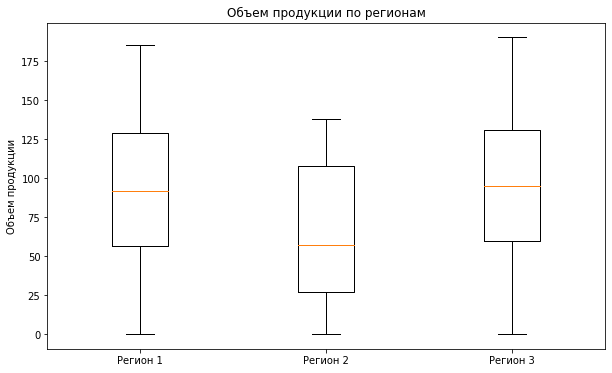

In [238]:
plt.figure(figsize=(10, 6))
plt.boxplot([data1['product'], data2['product'], data3['product']], labels=['Регион 1', 'Регион 2', 'Регион 3'])
plt.title('Объем продукции по регионам')
plt.ylabel('Объем продукции')
plt.show()

Следовательно, при разработке 200 скважин из 500, есть вероятность, что скважины принесут доход, а затем и прибыль.

1. Написана функция calculate_profit, которая учитывает предсказанный объем нефти, реальный объем нефти (из валидационных данных), цену нефти и пороговый уровень риска убытков. Функция возвращает общую прибыль, учитывая эти параметры.
2. С помощью функции calculate_profit расчитана прибыль для каждого региона и предсказан объем нефти для каждого региона.
3. Выведены результаты расчета прибыли для каждого региона.

## Расчёт прибыли и рисков 

In [239]:
def profit_for_region(predictions_valid, target_valid, budget, revenue_per_barrel):
    predictions = pd.Series(predictions_valid).reset_index(drop=True)
    target = pd.Series(target_valid).reset_index(drop=True)
    
    best_wells = target[predictions.sort_values(ascending=False).index][:wells_to_select]
    
    sum_target_best_wells = best_wells.sum()
    
    profit = (sum_target_best_wells * revenue_per_barrel - budget) / 1000000
    
    return profit, sum_target_best_wells

1. Выберите скважины с максимальными значениями предсказаний.
2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
3. Рассчитайте прибыль для полученного объёма сырья.

In [240]:
profit_reg1, sum_target_reg1 = profit_for_region(predictions_reg1_valid, target_reg1_valid, budget, revenue_per_barrel)
profit_reg2, sum_target_reg2 = profit_for_region(predictions_reg2_valid, target_reg2_valid, budget, revenue_per_barrel)
profit_reg3, sum_target_reg3 = profit_for_region(predictions_reg3_valid, target_reg3_valid, budget, revenue_per_barrel)

In [241]:
print(f'Прибыль в регионе 1: {profit_reg1} миллионов рублей, Объем сырья: {sum_target_reg1} тыс. баррелей')
print(f'Прибыль в регионе 2: {profit_reg2} миллионов рублей, Объем сырья: {sum_target_reg2} тыс. баррелей')
print(f'Прибыль в регионе 3: {profit_reg3} миллионов рублей, Объем сырья: {sum_target_reg3} тыс. баррелей')

Прибыль в регионе 1: 3320.8260431398508 миллионов рублей, Объем сырья: 29601.83565142189 тыс. баррелей
Прибыль в регионе 2: 2415.086696681511 миллионов рублей, Объем сырья: 27589.081548181137 тыс. баррелей
Прибыль в регионе 3: 2710.3499635998323 миллионов рублей, Объем сырья: 28245.22214133296 тыс. баррелей


In [242]:
def profit_for_def (target_valid, predictions_valid, wells_to_select):
    
    target = target_valid.reset_index(drop = True)
    predictions = pd.Series(predictions_valid, index = target.index)
    best_wells = target[predictions.sort_values(ascending = False).index][:wells_to_select]
    sum_target_best_wells = best_wells.sum()
    
    return (sum_target_best_wells * revenue_per_barrel - budget) / 1000000

In [243]:
def calculate_bootstrap_profit(target, predict, n):
    state = np.random.RandomState(12345)
    profits = []
    income_minus = 0       
        
    for i in range(1000):
        target_subsample = target.reset_index(drop= True).sample(n, random_state=state, replace=True)
        probs_subsample = predict[target_subsample.index]
        profits.append(profit_for_def(target_subsample,
                              probs_subsample, wells_to_select))
    profits = pd.Series(profits)
    
    
    income = pd.Series(profits)
    income_minus = (income[income < 0].count()) / 1000

    low = income.quantile(0.025)
    upp = income.quantile(0.975)
    print('Средняя прибыль в регионе равна:', income.mean())
    print('95% доверительный интервал лежит в диапазоне: от', low, 'до', upp)
    print('Вероятность убытка:', income_minus)

In [244]:
calculate_bootstrap_profit(target_reg1_valid, predictions_reg1_valid, 500)

Средняя прибыль в регионе равна: 396.1649848023711
95% доверительный интервал лежит в диапазоне: от -111.21554589049526 до 909.7669415534225
Вероятность убытка: 0.069


In [245]:
calculate_bootstrap_profit(target_reg2_valid, predictions_reg2_valid, 500)

Средняя прибыль в регионе равна: 456.04510578666077
95% доверительный интервал лежит в диапазоне: от 33.820509398983624 до 852.2894538660361
Вероятность убытка: 0.015


In [246]:
calculate_bootstrap_profit(target_reg3_valid, predictions_reg3_valid, 500)

Средняя прибыль в регионе равна: 404.40386656835676
95% доверительный интервал лежит в диапазоне: от -163.3504133956011 до 950.3595749237995
Вероятность убытка: 0.076


#  Вывод

При выборе лучших скважин из имеющихся в регионе следует, что самым прибыльным регионом оказался регион № 2.

В остальных регионах вероятность убытка выше, в то время как во втором она составляет всего 1,5%.

Однако разработка в других регионах тоже имеет место быть. В третьем регионе прибыль равна около 404 миллионам рублей при риске в 7,6%. В первом регионе - 396 миллионов рублей, при рисках в 6,9%.

1. Загружены данные, проведен анализ данных, удалён столбец с id, чтобы он не мешал при анализе данных, так как он не нужен.

2. Обучена модель для каждого региона, проанализированы результаты.

3. Проведена подготовка к расчёту прибыли. Все ключевые значения сохранены в отдельных переменных. 

4. Написана функция для расчета прибыли по выбранным скважинам и предсказаниям модели.

5. Посчитаны риски для каждого региона.